In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import geopandas
import contextily as ctx

## Crime Data

In [2]:
crime_path = "Datasets/borough_level_crime_24_month.csv"
crime_data = pd.read_csv(crime_path)

In [3]:
crime_data.head()

,MajorText,MinorText,LookUp_BoroughName,201712,201801,201802,201803,201804,201805,201806,...,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911
0,Arson and Criminal Damage,Arson,Barking and Dagenham,4,2,3,6,3,4,12,...,2,5,5,11,3,5,3,6,9,8
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,119,135,111,115,122,126,123,...,127,138,130,138,113,134,118,109,109,92
2,Burglary,Burglary - Business and Community,Barking and Dagenham,21,38,33,38,36,24,33,...,24,29,27,22,27,31,35,37,30,30
3,Burglary,Burglary - Residential,Barking and Dagenham,124,143,134,122,75,93,77,...,108,99,96,114,96,71,67,80,97,113
4,Drug Offences,Drug Trafficking,Barking and Dagenham,6,4,5,7,3,8,6,...,1,6,4,8,6,7,6,6,10,10


In [4]:
borough_crime = crime_data.groupby("LookUp_BoroughName").sum()
borough_crime["Total_crime_24_months"] = borough_crime.sum(axis=1)
borough_crime.index

Index(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'London Heathrow and London City Airports', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype='object', name='LookUp_BoroughName')

In [5]:
borough_crime.drop(index="London Heathrow and London City Airports", inplace=True)
borough_crime.shape

(32, 25)

## Population data

In [6]:
population_path = "Datasets/nationality-borough.xls"
population_data = pd.read_excel(population_path, header=0, sheet_name="2018",
                                index_col=1, usecols=2, skiprows=[1,2,3,4], nrows=33, na_values=":")

C:\Users\Robert\Anaconda3\envs\coursera_env\lib\site-packages\pandas\io\excel\_base.py:445: FutureWarning: Passing in an integer for `usecols` has been deprecated. Please pass in a list of int from 0 to `usecols` inclusive instead.
  usecols = _maybe_convert_usecols(usecols)


In [7]:
population_data.drop(index="City of London",inplace=True)
population_data.head()

,Area Code,Total
Area Name,,
Barking and Dagenham,E09000002,215.0
Barnet,E09000003,391.0
Bexley,E09000004,249.0
Brent,E09000005,328.0
Bromley,E09000006,332.0


In [8]:
population_data.shape

(32, 2)

In [9]:
crime_population = pd.concat([borough_crime["Total_crime_24_months"],population_data["Total"]], axis=1, sort=True)

In [10]:
crime_population["Crime_rate"] = crime_population["Total_crime_24_months"].div(crime_population["Total"]).round(1)

In [11]:
crime_population.sort_values(by=["Crime_rate"], inplace=True, ascending=False)

In [12]:
crime_population.head(10)

,Total_crime_24_months,Total,Crime_rate
Westminster,143349,251.0,571.1
Kensington and Chelsea,46637,154.0,302.8
Camden,74864,256.0,292.4
Hammersmith and Fulham,46023,180.0,255.7
Islington,58947,237.0,248.7
Southwark,74980,317.0,236.5
Hackney,65138,281.0,231.8
Haringey,63013,276.0,228.3
Lambeth,70894,326.0,217.5
Tower Hamlets,68210,314.0,217.2


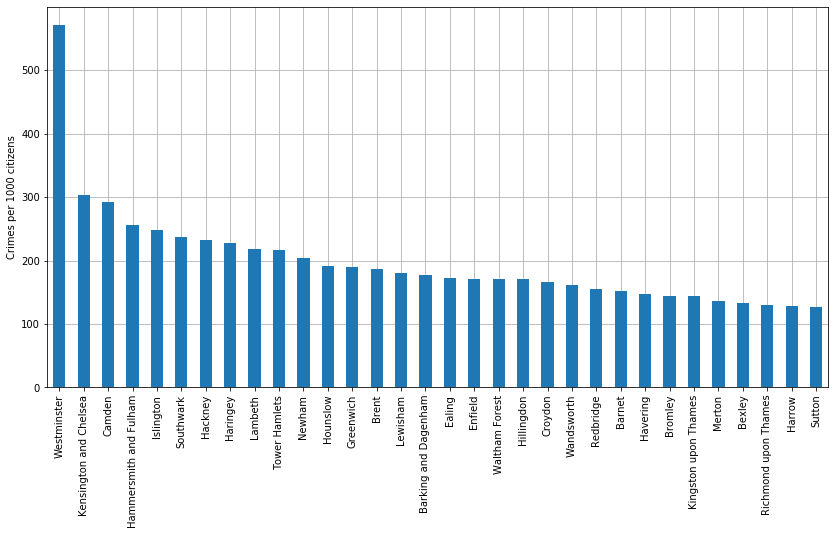

In [215]:
fig, ax = plt.subplots(figsize=(14,7))
crime_population["Crime_rate"].plot(kind="bar", ax=ax)
plt.grid()
plt.rc('axes', axisbelow=True)
plt.ylabel("Crimes per 1000 citizens")
plt.show()

In [14]:
crime_population.shape

(32, 3)

## Rent data

In [15]:
rent_path = "Datasets/average_rent_borough.xls"
rent_data = pd.read_excel(rent_path, header=2, sheet_name="Raw data", na_values=["-","."]).dropna()
rent_data.head()

,Year,Quarter,Code,Area,Category,Count of rents,Average,Lower quartile,Median,Upper quartile
1,2011,Q2,E09000002,Barking and Dagenham,Room,92.0,336,282,347,390
2,2011,Q2,E09000003,Barnet,Room,945.0,450,399,433,500
3,2011,Q2,E09000004,Bexley,Room,119.0,390,347,390,433
4,2011,Q2,E09000005,Brent,Room,344.0,469,390,457,550
5,2011,Q2,E09000006,Bromley,Room,142.0,433,380,400,450


In [44]:
rent_data["Median"] = rent_data["Median"].astype("int")

In [54]:
rent_2018 = rent_data[(rent_data["Year"]==2018) & (rent_data["Category"]=="One Bedroom")].drop("Year",axis=1)
rent_2018.tail()

,Quarter,Code,Area,Category,Count of rents,Average,Lower quartile,Median,Upper quartile
5671,Q3,E12000007,LONDON,One Bedroom,16260.0,1339,1060,1288,1500
5672,Q3,E12000008,SOUTH EAST,One Bedroom,17260.0,715,600,700,825
5673,Q3,E12000009,SOUTH WEST,One Bedroom,13040.0,587,495,574,650
5674,Q3,E13000001,Inner London,One Bedroom,9660.0,1514,1257,1425,1668
5675,Q3,E13000002,Outer London,One Bedroom,6600.0,1082,930,1050,1200


In [55]:
rent_2018 = rent_2018.groupby("Area").mean().round(0).sort_values(by="Median",ascending=False)
rent_2018.drop(index=["YORKSHIRE AND THE HUMBER","NORTH EAST","SOUTH EAST","EAST",
                      "SOUTH WEST","WEST MIDLANDS","EAST MIDLANDS","NORTH WEST"], inplace=True)

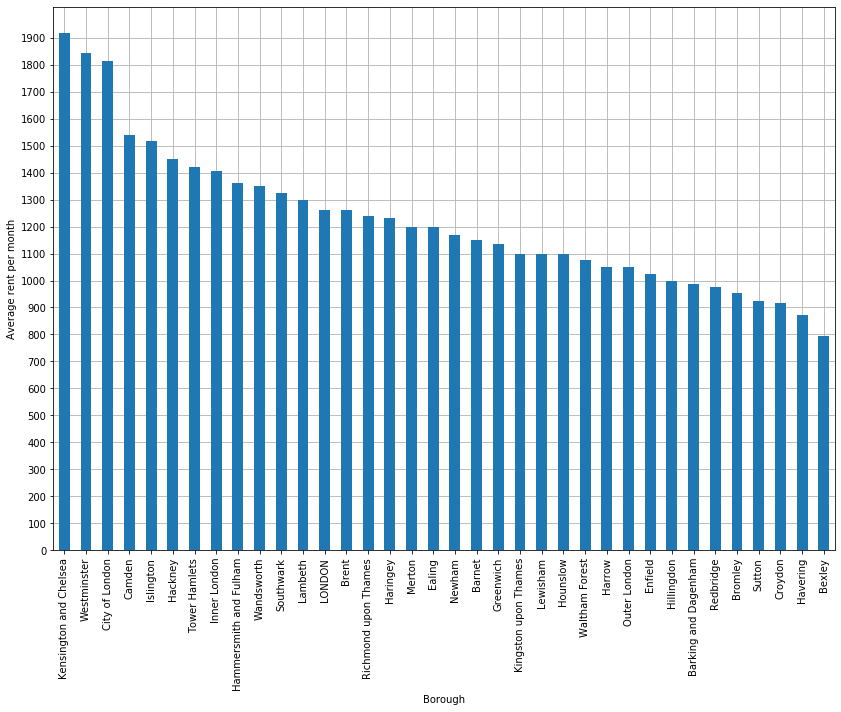

In [216]:
fig, ax = plt.subplots(figsize=(14,10))
rent_2018["Median"].plot(kind="bar", ax=ax)
plt.grid()
plt.rc('axes', axisbelow=True)
plt.xlabel("Borough")
plt.ylabel("Average rent per month")
plt.yticks(range(0,2000,100))
plt.show()

## Merging databases

In [20]:
summary_stats = crime_population.merge(rent_2018, left_index=True, right_on="Area").sort_index()
summary_stats.head()

,Total_crime_24_months,Total,Crime_rate,Count of rents,Median
Area,,,,,
Barking and Dagenham,38231,215.0,177.8,315.0,1200.0
Barnet,59112,391.0,151.2,975.0,1364.0
Bexley,33099,249.0,132.9,305.0,1038.0
Brent,60983,328.0,185.9,790.0,1500.0
Bromley,47973,332.0,144.5,690.0,1212.0


## London map - general

In [21]:
path = "Datasets/london_boroughs.geojson"
london_boroughs = geopandas.read_file(path)
london_boroughs.head()

,name,cartodb_id,created_at,updated_at,geometry
0,Barking and Dagenham,1,2015-07-01T09:57:45,2015-07-01T09:57:45,"MULTIPOLYGON (((0.14821 51.59963, 0.14820 51.5..."
1,Barnet,2,2015-07-01T09:57:45,2015-07-01T09:57:45,"MULTIPOLYGON (((-0.18336 51.66868, -0.18338 51..."
2,Bexley,3,2015-07-01T09:57:45,2015-07-01T09:57:45,"MULTIPOLYGON (((0.15804 51.50904, 0.15631 51.5..."
3,Brent,4,2015-07-01T09:57:45,2015-07-01T09:57:45,"MULTIPOLYGON (((-0.21214 51.55558, -0.21269 51..."
4,Bromley,5,2015-07-01T09:57:45,2015-07-01T09:57:45,"MULTIPOLYGON (((0.07646 51.43100, 0.07593 51.4..."


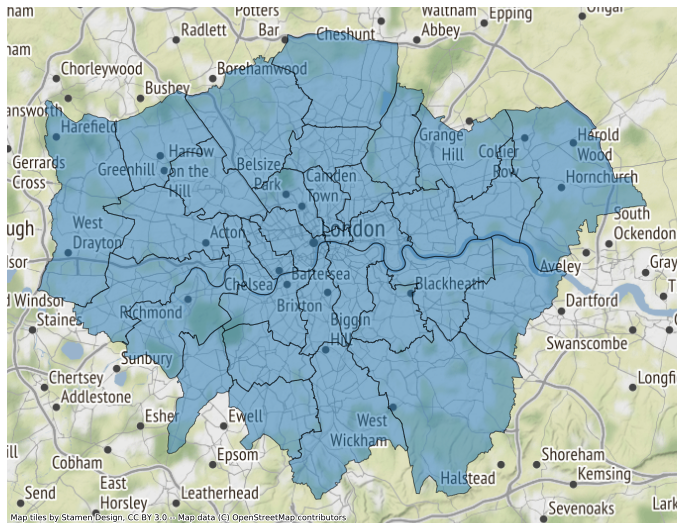

In [22]:
london_map = london_boroughs.to_crs(epsg=3857).plot(figsize=(12, 12), alpha=0.5, edgecolor='k')
london_map.set_axis_off()
ctx.add_basemap(london_map,zoom=10)
plt.show()

## London crime map

In [23]:
london_boroughs_1 = london_boroughs.merge(summary_stats, left_on="name", right_on="Area")
london_boroughs_1.head()

,name,cartodb_id,created_at,updated_at,geometry,Total_crime_24_months,Total,Crime_rate,Count of rents,Median
0,Barking and Dagenham,1,2015-07-01T09:57:45,2015-07-01T09:57:45,"MULTIPOLYGON (((0.14821 51.59963, 0.14820 51.5...",38231,215.0,177.8,315.0,1200.0
1,Barnet,2,2015-07-01T09:57:45,2015-07-01T09:57:45,"MULTIPOLYGON (((-0.18336 51.66868, -0.18338 51...",59112,391.0,151.2,975.0,1364.0
2,Bexley,3,2015-07-01T09:57:45,2015-07-01T09:57:45,"MULTIPOLYGON (((0.15804 51.50904, 0.15631 51.5...",33099,249.0,132.9,305.0,1038.0
3,Brent,4,2015-07-01T09:57:45,2015-07-01T09:57:45,"MULTIPOLYGON (((-0.21214 51.55558, -0.21269 51...",60983,328.0,185.9,790.0,1500.0
4,Bromley,5,2015-07-01T09:57:45,2015-07-01T09:57:45,"MULTIPOLYGON (((0.07646 51.43100, 0.07593 51.4...",47973,332.0,144.5,690.0,1212.0


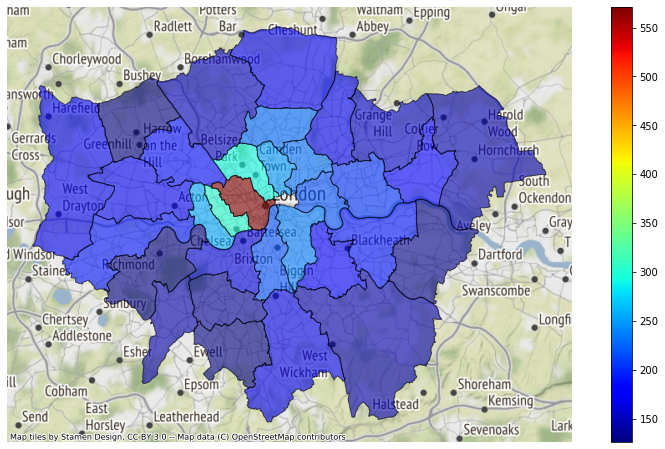

In [24]:
london_map_crime = london_boroughs_1.to_crs(epsg=3857).plot(figsize=(14, 8), alpha=0.6,
                                                            edgecolor='k', column="Crime_rate",
                                                            legend=True, cmap='jet')
ctx.add_basemap(london_map_crime,zoom=10)
london_map_crime.set_axis_off()
plt.show()

## London rent map

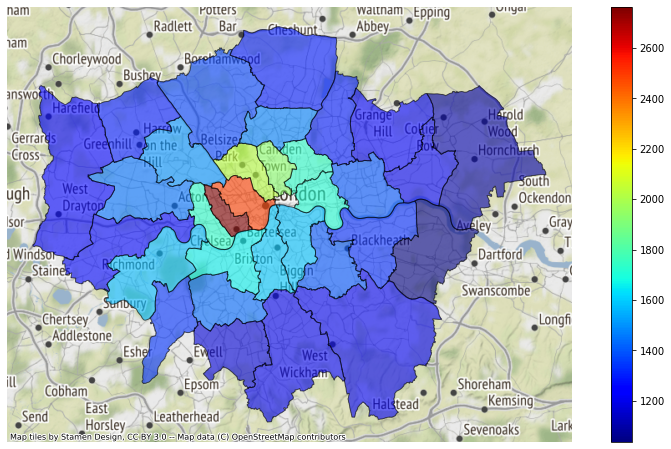

In [86]:
london_map_rent = london_boroughs_1.to_crs(epsg=3857).plot(figsize=(14, 8), alpha=0.6,
                                                            edgecolor='k', column="Median",
                                                            legend=True, cmap='jet')
ctx.add_basemap(london_map_rent,zoom=10)
london_map_rent.set_axis_off()
plt.show()

## FOURSQUARE API

In [26]:
import requests
from shapely.geometry import Point
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
from pandas.io.json import json_normalize

In [28]:
address = 'London, UK'
geolocator = Nominatim(user_agent="foursquare_agent",timeout=None)
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

51.5073219 -0.1276474


In [29]:
def get_location(borough):
    address = borough + ", UK"
    geolocator = Nominatim(user_agent="foursquare_agent",timeout=None)
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return (latitude, longitude)

london_boroughs_1["ref_point"] = london_boroughs_1["name"].apply(get_location)
london_boroughs_1["lan"] = london_boroughs_1["ref_point"].apply(lambda coordinates: coordinates[0])
london_boroughs_1["lon"] = london_boroughs_1["ref_point"].apply(lambda coordinates: coordinates[1])
london_boroughs_1.head()

,name,cartodb_id,created_at,updated_at,geometry,Total_crime_24_months,Total,Crime_rate,Count of rents,Median,ref_point,lan,lon
0,Barking and Dagenham,1,2015-07-01T09:57:45,2015-07-01T09:57:45,"MULTIPOLYGON (((0.14821 51.59963, 0.14820 51.5...",38231,215.0,177.8,315.0,1200.0,"(51.5541171, 0.15050434261994267)",51.554117,0.150504
1,Barnet,2,2015-07-01T09:57:45,2015-07-01T09:57:45,"MULTIPOLYGON (((-0.18336 51.66868, -0.18338 51...",59112,391.0,151.2,975.0,1364.0,"(51.6487843, -0.1729127)",51.648784,-0.172913
2,Bexley,3,2015-07-01T09:57:45,2015-07-01T09:57:45,"MULTIPOLYGON (((0.15804 51.50904, 0.15631 51.5...",33099,249.0,132.9,305.0,1038.0,"(51.4416793, 0.150488)",51.441679,0.150488
3,Brent,4,2015-07-01T09:57:45,2015-07-01T09:57:45,"MULTIPOLYGON (((-0.21214 51.55558, -0.21269 51...",60983,328.0,185.9,790.0,1500.0,"(51.4416354, 0.2345194)",51.441635,0.234519
4,Bromley,5,2015-07-01T09:57:45,2015-07-01T09:57:45,"MULTIPOLYGON (((0.07646 51.43100, 0.07593 51.4...",47973,332.0,144.5,690.0,1212.0,"(51.4028046, 0.0148142)",51.402805,0.014814


In [227]:
new_points_coordinates = [(51.3747,-0.01719),
                          (51.6018,-0.48498),
                          (51.3621,0.074745),
                          (51.3124,0.05169),
                          (51.562,0.21188),
                          (51.3760,-0.313),
                          (51.634757, -0.2526), #Borehamwood
                          (51.574059, -0.396454), #Greenhill
                          (51.51168, 0.2181), #Aveley
                          (51.59556, 0.19566), #Harold Wood
                          (51.495414, -0.4806), #West Drayton
                          (51.5414, -0.2762), #Wembley
                          (51.4637, -0.112925),#Brixton
                          (51.602194, -0.015865),
                          (51.521428, -0.420008),
                          (51.542626, -0.376996),
                          (51.472855, 0.094587),
                          (51.586507, -0.269717),
                          (51.5283, -0.141098),
                          (51.450541, -0.165858),
                          (51.451368, -0.298793),
                          (51.423249, -0.113375),
                          (51.442625, -0.116495),
                          (51.458881, -0.278566),
                          (51.490092, -0.277389),
                          (51.499713, -0.019194),
                          (51.485500, -0.049895),
                          (51.507789, 0.127640),
                          (51.476244, -0.263196),
                          (51.397874, -0.109385),
                          (51.395948, -0.192025),
                          (51.583157, -0.231282)] 

old_points_coordinates = [(x,y) for x,y in london_boroughs_1["ref_point"]]
all_points_coordinates = new_points_coordinates + old_points_coordinates

latitude_search = []
longitude_search = []

for coordinate in all_points_coordinates:
    latitude_search.append(coordinate[0])
    longitude_search.append(coordinate[1])

In [228]:
new_points = [Point(x,y) for y,x in new_points_coordinates]
points = [Point(x,y) for y,x in london_boroughs_1["ref_point"]]
points = points+new_points

In [229]:
crs = {"init": "epsg:4326"}
points_boroughs = geopandas.GeoDataFrame(geometry = points, crs=crs)
points_boroughs.tail()

,geometry
59,POINT (0.12764 51.50779)
60,POINT (-0.26320 51.47624)
61,POINT (-0.10938 51.39787)
62,POINT (-0.19203 51.39595)
63,POINT (-0.23128 51.58316)


In [230]:
#transforming epsg
points_boroughs_3857 = points_boroughs.to_crs(epsg=3857)
points_boroughs_3857.tail()

,geometry
59,POINT (14208.820 6711612.049)
60,POINT (-29298.845 6705972.088)
61,POINT (-12176.683 6691977.100)
62,POINT (-21376.125 6691633.465)
63,POINT (-25746.194 6725102.996)


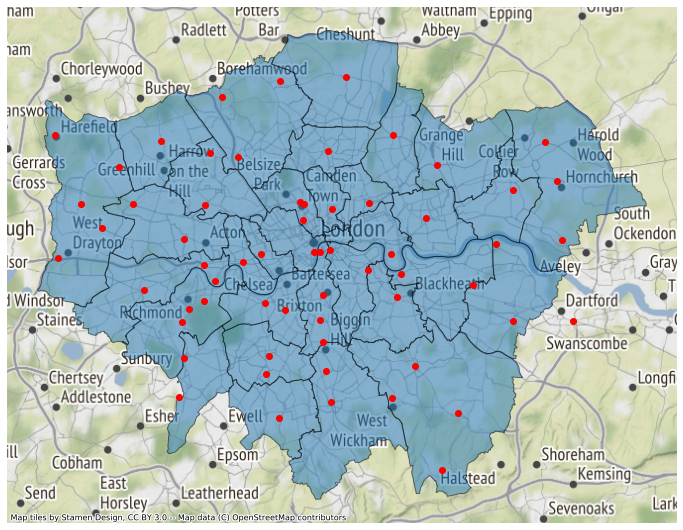

In [231]:
london_map_3 = london_boroughs.to_crs(epsg=3857).plot(figsize=(12, 12), alpha=0.5, edgecolor='k')
london_map_3.set_axis_off()
ctx.add_basemap(london_map_3,zoom=10)
points_boroughs_3857.plot(ax=london_map_3,color="red")
plt.show()

## Scanning for venues

In [232]:
def get_locations(lat,lon):
    radius = 4500
    search_query = "restaurant"
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lon, VERSION, search_query, radius, 50)
    results = requests.get(url).json()
    venues = results['response']['venues']
    dataframe = json_normalize(venues)
    return dataframe

scanning_dfs = []

for i in range(0,len(latitude_search)):
    scanning_dfs.append(get_locations(latitude_search[i],longitude_search[i]))


In [233]:
len(scanning_dfs)

64

In [234]:
result = pd.concat(scanning_dfs, sort="False")
result.drop_duplicates(subset = "id", inplace=True)
result.head()
#964

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4f04af1f2fb6e1c99f3db0bb', 'name': 'T...",False,4d2feab35f806dcb381514ac,21 Ravenswood Crescent,GB,West Wickham,United Kingdom,NaN,562,"[21 Ravenswood Crescent, West Wickham, Greater...","[{'label': 'display', 'lat': 51.37960511150324...",51.379605,-0.015264,NaN,BR4 0JH,Greater London,Marmaris Restaurant,v-1579117473,NaN
1,"[{'id': '4bf58dd8d48988d157941735', 'name': 'N...",False,53e4b48b498ef480993502b3,103 High St,GB,West Wickham,United Kingdom,NaN,276,"[103 High St, West Wickham, Greater London, BR...","[{'label': 'display', 'lat': 51.37672296066333...",51.376723,-0.019510,NaN,BR4 0LT,Greater London,Harpers Restaurant,v-1579117473,NaN
2,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",False,4f86b98fe4b0b24cb00fb1a6,103 High St.,GB,Kent,United Kingdom,NaN,288,"[103 High St., Kent, BR4 0LT, United Kingdom]","[{'label': 'display', 'lat': 51.376849, 'lng':...",51.376849,-0.019517,NaN,BR4 0LT,Kent,Cru Restaurant,v-1579117473,NaN
3,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,4dcd7169ae603b786d164ff9,NaN,GB,Bromley,United Kingdom,NaN,309,"[Bromley, Greater London, United Kingdom]","[{'label': 'display', 'lat': 51.377117, 'lng':...",51.377117,-0.019397,NaN,NaN,Greater London,Yoons Chinese & Malaysian Restaurant,v-1579117473,NaN
4,"[{'id': '4bf58dd8d48988d1c8941735', 'name': 'A...",False,4b5a41def964a52002b828e3,224 Portland Rd,GB,South Norwood,United Kingdom,NaN,3907,"[224 Portland Rd, South Norwood, Greater Londo...","[{'label': 'display', 'lat': 51.39177138157308...",51.391771,-0.066337,NaN,SE25 4QB,Greater London,The Gold Coast Bar & Restaurant,v-1579117473,NaN


In [235]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in result.columns if col.startswith('location.')] + ['id']
dataframe_filtered = result.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

points = [Point(x,y) for x,y in zip(dataframe_filtered["lng"],dataframe_filtered["lat"])]

crs = {"init": "epsg:4326"}
geo_df = geopandas.GeoDataFrame(geometry = points, crs=crs)
geo_df_3857 = geo_df.to_crs(epsg=3857)
geo_df_3857.shape

(1237, 1)

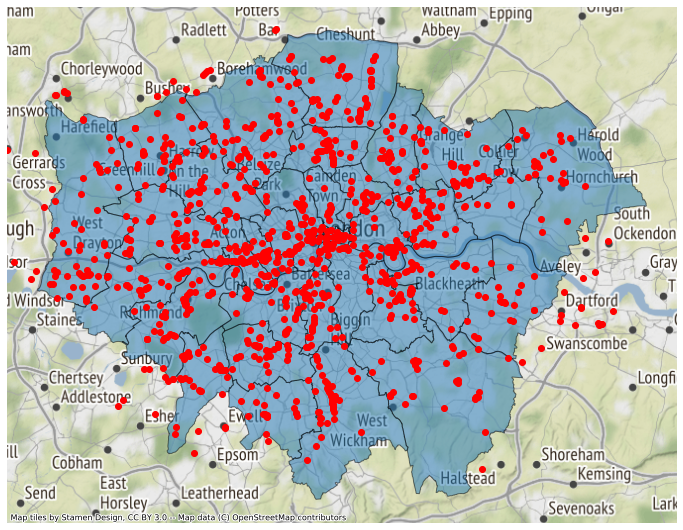

In [236]:
london_map_2 = london_boroughs.to_crs(epsg=3857).plot(figsize=(12, 12), alpha=0.5, edgecolor='k')
london_map_2.set_axis_off()
ctx.add_basemap(london_map_2,zoom=10)
geo_df_3857.plot(ax=london_map_2,color="red")
plt.show()

In [237]:
london_boroughs.head()

,name,cartodb_id,created_at,updated_at,geometry
0,Barking and Dagenham,1,2015-07-01T09:57:45,2015-07-01T09:57:45,"MULTIPOLYGON (((0.14821 51.59963, 0.14820 51.5..."
1,Barnet,2,2015-07-01T09:57:45,2015-07-01T09:57:45,"MULTIPOLYGON (((-0.18336 51.66868, -0.18338 51..."
2,Bexley,3,2015-07-01T09:57:45,2015-07-01T09:57:45,"MULTIPOLYGON (((0.15804 51.50904, 0.15631 51.5..."
3,Brent,4,2015-07-01T09:57:45,2015-07-01T09:57:45,"MULTIPOLYGON (((-0.21214 51.55558, -0.21269 51..."
4,Bromley,5,2015-07-01T09:57:45,2015-07-01T09:57:45,"MULTIPOLYGON (((0.07646 51.43100, 0.07593 51.4..."


In [238]:
import geopandas as gpd

# Read the data.
polygons_series = london_boroughs["geometry"]
polygons = gpd.GeoDataFrame(polygons_series)
points = geo_df

The algorithm below I've found on StackOverflow and it works fine.

In [239]:
# Make a copy because I'm going to drop points as I
# assign them to polys, to speed up subsequent search.
pts = points.copy() 

# We're going to keep a list of how many points we find.
pts_in_polys = []

# Loop over polygons with index i.
for i, poly in polygons.iterrows():

    # Keep a list of points in this poly
    pts_in_this_poly = []

    # Now loop over all points with index j.
    for j, pt in pts.iterrows():
        if poly.geometry.contains(pt.geometry):
            # Then it's a hit! Add it to the list,
            # and drop it so we have less hunting.
            pts_in_this_poly.append(pt.geometry)
            pts = pts.drop([j])

    # We could do all sorts, like grab a property of the
    # points, but let's just append the number of them.
    pts_in_polys.append(len(pts_in_this_poly))

# Add the number of points for each poly to the dataframe.
polygons['number of points'] = gpd.GeoSeries(pts_in_polys)

C:\Users\Robert\Anaconda3\envs\coursera_env\lib\site-packages\ipykernel_launcher.py:27: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.


In [240]:
venues_count = pd.concat([polygons,london_boroughs["name"]], axis=1).drop("geometry",axis=1).sort_values(by="number of points",ascending=False)

In [241]:
venues_count = venues_count.reset_index().drop("index", axis=1)

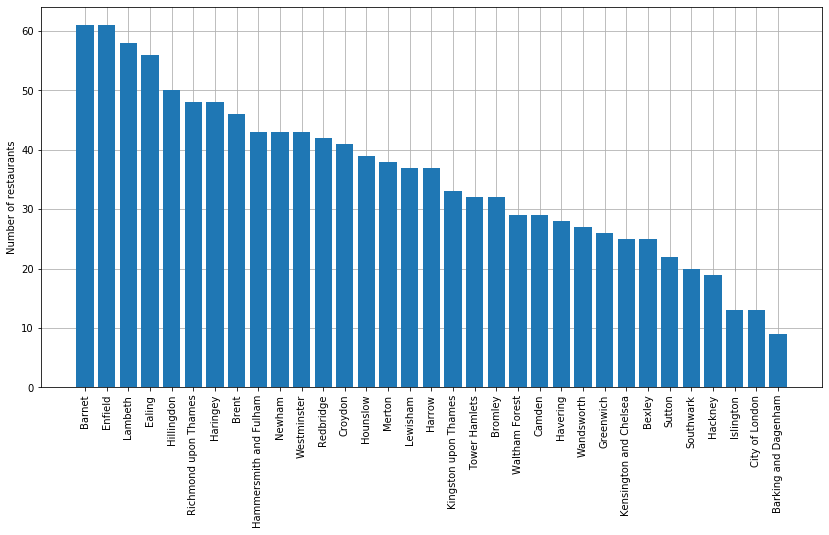

In [242]:
fig, ax = plt.subplots(figsize=(14,7))
ax.bar(venues_count.index, venues_count["number of points"])
plt.ylabel("Number of restaurants")
plt.xticks(ticks = range(0,len(venues_count)),labels=venues_count["name"], rotation=90)
plt.grid()
plt.rc('axes', axisbelow=True)
plt.show()

#Enfield, Ealing, Lambeth